# Covid19 Analysis Demo
This jupyter notebook allows one to compare groups of states using the data from covidtracking.com
in a per capita basis or with raw numbers...

In [17]:
from covid19 import *
import matplotlib.pyplot as plt
import numpy as np
import json

In [18]:
cdata = get_covid_data()

In [19]:
stateData = json.load(open("states.json","r"))
states = {
    "AL": "Alabama",
    "AK": "Alaska",
    #"AS": "American Samoa",
    "AZ": "Arizona",
    "AR": "Arkansas",
    "CA": "California",
    "CO": "Colorado",
    "CT": "Connecticut",
    "DE": "Delaware",
    #"DC": "District Of Columbia",
    #"FM": "Federated States Of Micronesia",
    "FL": "Florida",
    "GA": "Georgia",
    #"GU": "Guam",
    "HI": "Hawaii",
    "ID": "Idaho",
    "IL": "Illinois",
    "IN": "Indiana",
    "IA": "Iowa",
    "KS": "Kansas",
    "KY": "Kentucky",
    "LA": "Louisiana",
    "ME": "Maine",
    #"MH": "Marshall Islands",
    "MD": "Maryland",
    "MA": "Massachusetts",
    "MI": "Michigan",
    "MN": "Minnesota",
    "MS": "Mississippi",
    "MO": "Missouri",
    "MT": "Montana",
    "NE": "Nebraska",
    "NV": "Nevada",
    "NH": "New Hampshire",
    "NJ": "New Jersey",
    "NM": "New Mexico",
    "NY": "New York",
    "NC": "North Carolina",
    "ND": "North Dakota",
    #"MP": "Northern Mariana Islands",
    "OH": "Ohio",
    "OK": "Oklahoma",
    "OR": "Oregon",
    #"PW": "Palau",
    "PA": "Pennsylvania",
    #"PR": "Puerto Rico",
    "RI": "Rhode Island",
    "SC": "South Carolina",
    "SD": "South Dakota",
    "TN": "Tennessee",
    "TX": "Texas",
    "UT": "Utah",
    "VT": "Vermont",
    #"VI": "Virgin Islands",
    "VA": "Virginia",
    "WA": "Washington",
    "WV": "West Virginia",
    "WI": "Wisconsin",
    "WY": "Wyoming"
}
len(states.keys())

50

In [20]:
len(cdata[0])
states['WA']
stateData['data'][0]

def statePop(state):
    x = [d['Pop'] for d in stateData['data'] if state in states and d['State']==states[state]]
    return x[0] if len(x)>0 else 100000000
[statePop(state) for state in states]



[4908621,
 734002,
 7378494,
 3038999,
 39937489,
 5845526,
 3563077,
 982895,
 21992985,
 10736059,
 1412687,
 1826156,
 12659682,
 6745354,
 3179849,
 2910357,
 4499692,
 4645184,
 1345790,
 6083116,
 6976597,
 10045029,
 5700671,
 2989260,
 6169270,
 1086759,
 1952570,
 3139658,
 1371246,
 8936574,
 2096640,
 19440469,
 10611862,
 761723,
 11747694,
 3954821,
 4301089,
 12820878,
 1056161,
 5210095,
 903027,
 6897576,
 29472295,
 3282115,
 628061,
 8626207,
 7797095,
 1778070,
 5851754,
 567025]

In [21]:
cdata[0][11]

{'date': 20200715,
 'state': 'GA',
 'positive': 127834,
 'negative': 1027149,
 'pending': None,
 'hospitalizedCurrently': 2786,
 'hospitalizedCumulative': 14102,
 'inIcuCurrently': None,
 'inIcuCumulative': 2702,
 'onVentilatorCurrently': None,
 'onVentilatorCumulative': None,
 'recovered': None,
 'dataQualityGrade': 'A',
 'lastUpdateEt': '7/15/2020 14:50',
 'dateModified': '2020-07-15T14:50:00Z',
 'checkTimeEt': '07/15 10:50',
 'death': 3091,
 'hospitalized': 14102,
 'dateChecked': '2020-07-15T14:50:00Z',
 'totalTestsViral': 1154983,
 'positiveTestsViral': 116295,
 'negativeTestsViral': 1038688,
 'positiveCasesViral': 127834,
 'deathConfirmed': None,
 'deathProbable': None,
 'fips': '13',
 'positiveIncrease': 3871,
 'negativeIncrease': 20078,
 'total': 1154983,
 'totalTestResults': 1154983,
 'totalTestResultsIncrease': 23949,
 'posNeg': 1154983,
 'deathIncrease': 37,
 'hospitalizedIncrease': 417,
 'hash': '937e13fb21fc23216ae76f6cd2b8bb3e66f01347',
 'commercialScore': 0,
 'negativeReg

In [22]:
dates = sorted(list({ x['date'] for x in cdata[0]}))
dayOfPandemic={}
count=22
for d in dates:
    dayOfPandemic[d]=count
    count = count + 1
#dayOfPandemic

In [96]:
def getField(x,field):
    if field in x:
        z = x[field]
        if (z==None):
            return 0
        else:
            return z
    else:
        return 0
def getStateData(state,field):
    sd = [(x['date'],getField(x,field)) for x in cdata[0] if x['state'] == state]
    return sorted(sd)

#f = 'hospitalizedCurrently'
f="deathIncrease"
#f = "positive"
rankstates = sorted([(round(10000*getField(d,f)/statePop(d['state']),2),d['state'],d['death']) for d in cdata[0] if d['date'] == 20200715],reverse=True)
highestCases = [d[1] for d in rankstates]
highestCases[:10]
rankstates[:10]
def getHighest(field):
    rankstates = sorted([(round(10000*getField(d,f)/statePop(d['state']),2),d['state'],d['death']) for d in cdata[0] if d['date'] == 20200715],reverse=True)
    highest = [d[1] for d in rankstates]
    return highest
highestCases = getHighest(f)

[(0.13, 'AZ', 2434),
 (0.1, 'AL', 1211),
 (0.06, 'MS', 1290),
 (0.05, 'FL', 4626),
 (0.04, 'TX', 3432),
 (0.04, 'ND', 81),
 (0.04, 'MA', 8368),
 (0.04, 'KS', 299),
 (0.04, 'CA', 7227),
 (0.03, 'NJ', 15607)]

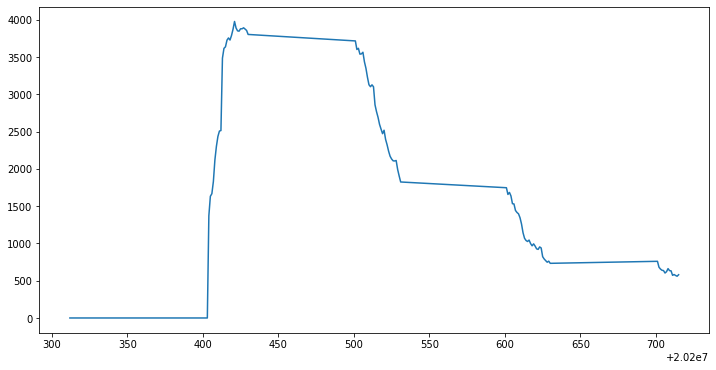

In [24]:
z = getStateData('MA','hospitalizedCurrently')
#plt.plot([x[0] for x in z],[x[1] for x in z])
def plotItems(items,field):
    plt.plot([x[0] for x in items],[x[1] for x in items],label=field)
plotItems(z,'label')

In [25]:
def weeklyAvg(L):
    week = [0,0,0,0,0,0,0]
    newL=[]
    for x in L:
        week = week[1:]+[x[1]]
        newL += [(x[0],sum(week)/7)]
    return newL

def collectData(states,field,options):
    perCapita = options['perCapita'] if 'perCapita' in options else False
    averageByWeek = options['averageByWeek'] if 'averageByWeek' in options else False
    pop=0
    for st in states:
        pop += statePop(st)
    data={}
    for d in cdata[0]:
        s=d['state']
        if s in states:
            n = getField(d,field)
            if d['date'] in data:
                data[d['date']] += n
            else:
                data[d['date']] = n
    z = sorted(data.items())
    if perCapita:
        z = [(dayOfPandemic[d[0]],d[1]*10000/pop) for d in z]
    else:
        z = [(dayOfPandemic[d[0]],d[1]) for d in z]
    if averageByWeek:
        z = weeklyAvg(z)
        
    return z

def collectData2(states,field,perCapita):
    pop=0
    for st in states:
        pop += statePop(st)
    data={}
    for d in cdata[0]:
        s=d['state']
        if s in states:
            n = getField(d,field)
            if d['date'] in data:
                data[d['date']] += [(n,s)]
            else:
                data[d['date']] = [(n,s)]
    for d in data: 
        data[d] = sorted(data[d],reverse=True)
        #print(data[d])
    z = sorted(data.items())
    if perCapita:
        z = [(dayOfPandemic[d[0]],d[1]*10000/pop) for d in z]
    else:
        z = [(dayOfPandemic[d[0]],d[1]) for d in z]
        
    return z



In [26]:
zz = collectData(['MA','NY','CT'],'positive',{})
zz[0:5]


[(64, 6), (65, 22), (66, 33), (67, 76), (68, 106)]

In [70]:
def slope(dt,data):
    """ slope(data,dt) returns a list of the daily increase averaged over dt days
        setting dt=0 returns the original data
    """
    if dt==0:
        return data
    slopedata = []
    for i in range(len(data)):
        cur = data[i]
        prev = data[i-dt if i>=dt else 0]
        y1 = cur[1]
        y0 = prev[1]
        slopedata += [(cur[0],(y1-y0)/dt)]
    return slopedata
zzs = slope(0,zz)
zzs[0:14]


[(64, 6),
 (65, 22),
 (66, 33),
 (67, 76),
 (68, 106),
 (69, 143),
 (70, 175),
 (71, 219),
 (72, 230),
 (73, 450),
 (74, 573),
 (75, 813),
 (76, 1073),
 (77, 1859)]

In [27]:

dayOfPandemic[20200122]


22

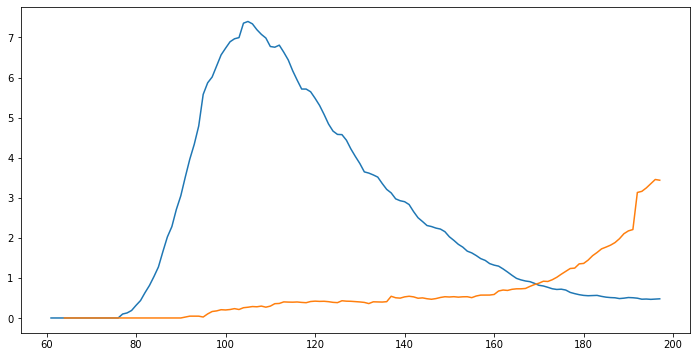

In [28]:
field = 'hospitalizedCurrently'
plotItems(collectData(['MA','NY','CT','RI','NH','VT'],field,{'perCapita':True}),field)
plotItems(collectData(['AZ','TX','OK','FL','GA','AL','MS'],field,{'perCapita':True}),field)


In [29]:
demStates = ['WA','OR','CA','NV','CO','NM',
            'MN','IL','VA','MD','DE','NJ',
            'NY','CT','RI','MA','VT','NH','ME','HI']
def otherStates(L):
    return [s for s in states.keys() if s not in L]
repStates = [s for s in states.keys() if s not in demStates]
def regionPop(states):
    pop=0
    for st in states:
        pop += statePop(st)
    return(pop)
print(regionPop(demStates))
print(regionPop(repStates))
#print(demStates)
#print(repStates)
len(demStates)+len(repStates)
dayOfPandemic[20200228]
cdata[0][-1]
zzz = collectData(repStates,field,{'perCapita':True})
list(dayOfPandemic.items())[0:20]
zzz[0:50]
len(demStates)
print(collectData(repStates,'hospitalizedCurrently',{'perCapita':False})[-10:])
print(sum([1,2,3]))

print(weeklyAvg(collectData(repStates,'hospitalizedCurrently',{'perCapita':False}))[-10:])
        
        

141900730
188697575
[(188, 25308), (189, 26696), (190, 27515), (191, 28057), (192, 35817), (193, 36145), (194, 36983), (195, 38129), (196, 39263), (197, 39462)]
6
[(188, 23154.0), (189, 23966.571428571428), (190, 24772.85714285714), (191, 25531.0), (192, 27331.285714285714), (193, 29119.14285714286), (194, 30931.571428571428), (195, 32763.14285714286), (196, 34558.42857142857), (197, 36265.142857142855)]


13.102902932306323
86.89709706769368


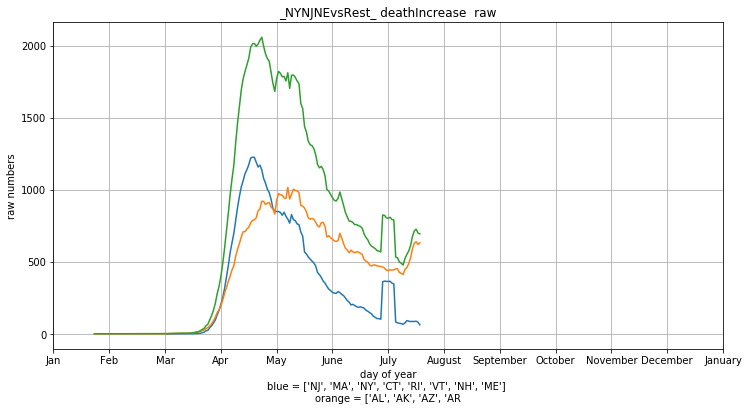

In [30]:
northEast = ['NJ','MA','NY','CT','RI','VT','NH','ME']
deepSouth = ['FL','AL','GA','MS','LA','AR','SC','NC','WV','VA','KY','TX']

"""
blueStates = ['NJ','MA','NY','CT','RI','VT','NH','ME'] 
redStates = otherStates(blueStates)
flag="_NYNJNEvsRest_"
blueLabel="NY,NJ,NE"
redLabel="Rest"


blueStates =  demStates
redStates = repStates
flag="_2020Election_"
blueLabel="Dem"
redLabel="Rep"

blueStates = ['NM']
redStates=['AZ','UT','CO','OK','TX']
flag = "NM_vs_neighbors"
blueLabel="NM"
redLabel="neighbors"

state="FL"
blueStates = [state]
redStates=otherStates(blueStates)
flag = state+"_vs_rest_of_US"
blueLabel=state
redLabel="rest of US"

blueStates =  demStates
redStates = repStates
flag="_2020Election_"
blueLabel="Dem"
redLabel="Rep"


highestR = ['AZ','TX','FL','MS','CA','SC','LA','AL','GA']
blueStates = highestR
redStates = otherStates(blueStates)
allStates=states
flag = "highestR vs US..."
blueLabel="highestR"
redLabel="others"
"""

blueStates = ['NJ','MA','NY','CT','RI','VT','NH','ME'] 
redStates = otherStates(blueStates)
flag="_NYNJNEvsRest_"
blueLabel="NY,NJ,NE"
redLabel="Rest"

bluePop = regionPop(blueStates)
redPop = regionPop(redStates)
totPop = bluePop+redPop

print(bluePop/totPop*100)
print(redPop/totPop*100)

perCapita=False
averageByWeek=True

plt.rcParams['figure.figsize'] = [12, 6]
fig, ax = plt.subplots()
#field = 'positiveIncrease'
field = 'deathIncrease'
#field = "hospitalizedCurrently"
#field = "hospitalizedCumulative"
#field = "death"
#field = "positive"
#field = "hospitalized"
#field = "inIcuCurrently"
#field = "onVentilatorCurrently"
#field = "totalTestResultsIncrease"
## here we can plot all of the states!!
#for state in deepSouth:
#    plotItems(collectData([state],field,{'perCapita':perCapita,'averageByWeek':averageByWeek}),state)

plotItems(collectData(blueStates,field,{'perCapita':perCapita,'averageByWeek':averageByWeek}),blueLabel)
plotItems(collectData(redStates,field,{'perCapita':perCapita,'averageByWeek':averageByWeek}),redLabel)
plotItems(collectData(states,field,{'perCapita':perCapita,'averageByWeek':averageByWeek}),'US')

ax.set(xlabel='day of year',
       ylabel='per 10000' if perCapita else "raw numbers",
       title=flag+" "+field+" "+(" p10K" if perCapita else " raw"))
plt.xlabel(('''day of year
blue = '''+str(blueStates)+''' 
orange = '''+ str(redStates))[:100])
plt.xticks([0,30,60,90,120,150,180,210,240,270,300,330,360],'Jan Feb Mar Apr May June July August September October November December January'.split(' '))
#plt.yticks(np.arange(0,110000,step=10000))
#legend = ax.legend(loc='upper left', shadow=True, fontsize='x-large')
ax.grid()
fig.savefig("plot_"+flag+field+("_p10k" if perCapita else "_raw")+".png")


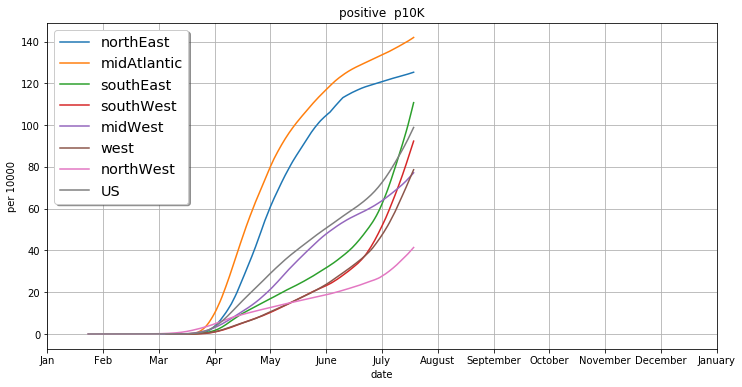

In [45]:
northEast = ['MA','CT','RI','VT','NH','ME']
midAtlantic = ['NY','PA','NJ','DE','MD','VA','WV']
southEast=['NC','SC','GA','FL','AL','MS','LA','AR','TN']
southWest = ['TX','OK','NM','CO','UT','AZ']
midWest=['OH','KY','IN','IL','MI','WI','MO','IA','MN',
         'KS','NE','SD','ND']
west = ['CA','NV','HI']
northWest = ['WY','MT','ID','OR','WA','AK']


perCapita=True
averageByWeek=True

plt.rcParams['figure.figsize'] = [12, 6]
fig, ax = plt.subplots()
field="positive"
#field = 'positiveIncrease'
#field = 'deathIncrease'
#field = "hospitalizedCurrently"
#field = "hospitalizedCumulative"
#field = "death"
#field = "positive"
#field = "hospitalized"
#field = "inIcuCurrently"
#field = "onVentilatorCurrently"
#field = "totalTestResultsIncrease"
## here we can plot all of the states!!
#for state in deepSouth:
#    plotItems(collectData([state],field,{'perCapita':perCapita,'averageByWeek':averageByWeek}),state)

options = {'perCapita':perCapita,'averageByWeek':averageByWeek}

plotItems(collectData(northEast,field,options),'northEast')
plotItems(collectData(midAtlantic,field,options),'midAtlantic')
plotItems(collectData(southEast,field,options),'southEast')
plotItems(collectData(southWest,field,options),'southWest')
plotItems(collectData(midWest,field,options),'midWest')
plotItems(collectData(west,field,options),'west')
plotItems(collectData(northWest,field,options),'northWest')
plotItems(collectData(states,field,options),'US')
ax.set(xlabel='day of year',
       ylabel='per 10000' if perCapita else "raw numbers",
       title=field+" "+(" p10K" if perCapita else " raw"))
plt.xlabel('date')
plt.xticks([0,30,60,90,120,150,180,210,240,270,300,330,360],'Jan Feb Mar Apr May June July August September October November December January'.split(' '))
#plt.yticks(np.arange(0,110000,step=10000))
legend = ax.legend(loc='upper left', shadow=True, fontsize='x-large')
ax.grid()
fig.savefig("plot_"+flag+field+("_p10k" if perCapita else "_raw")+".png")


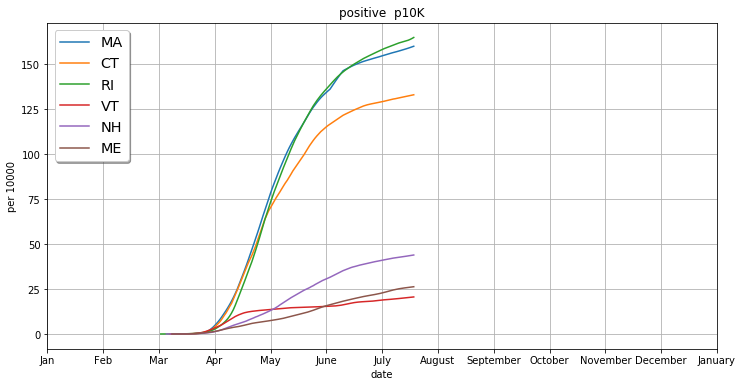

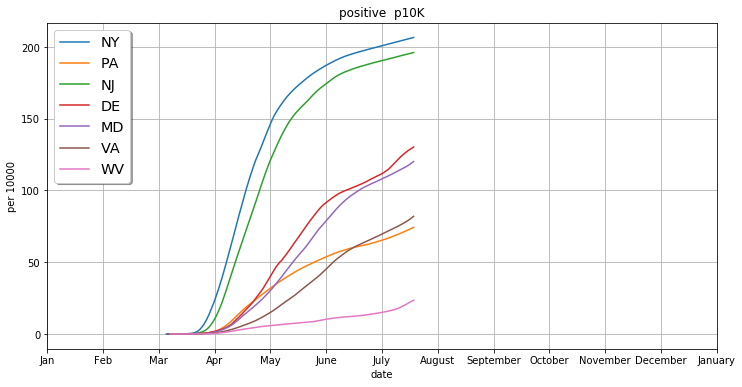

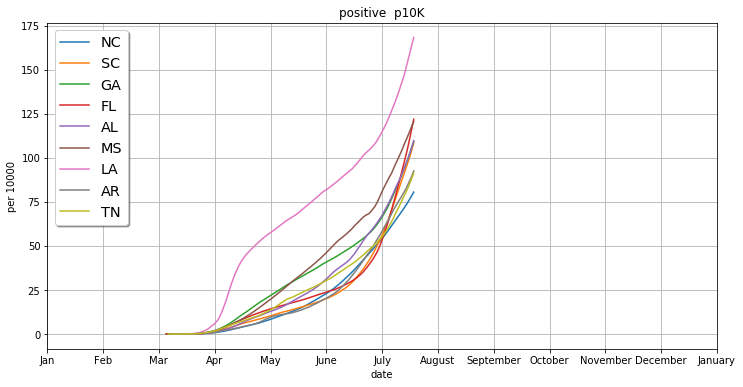

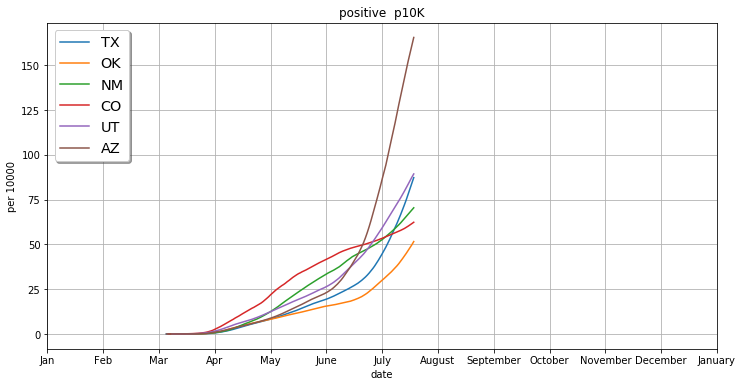

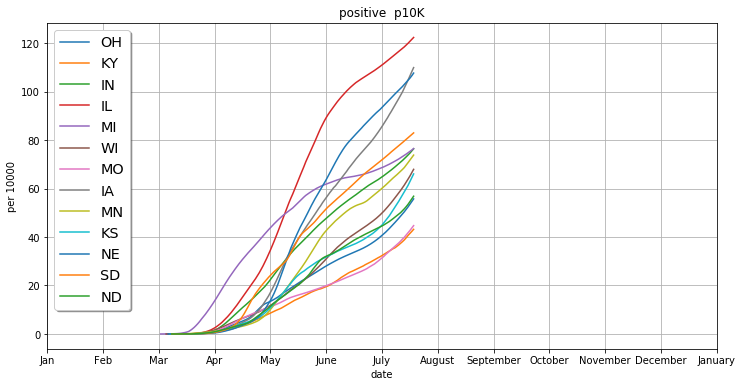

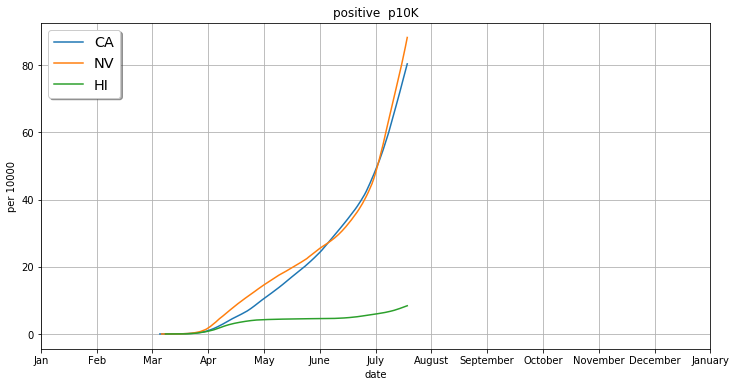

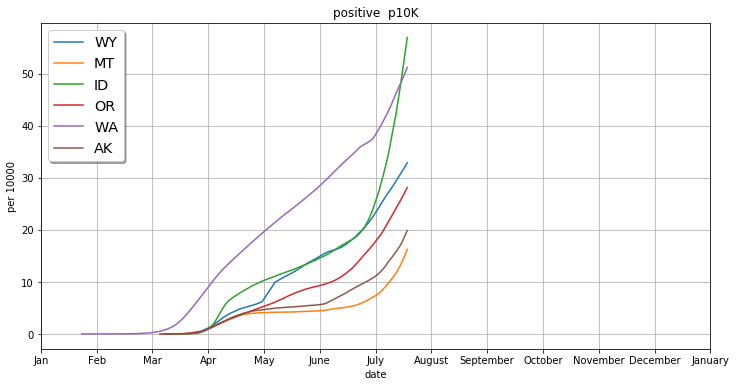

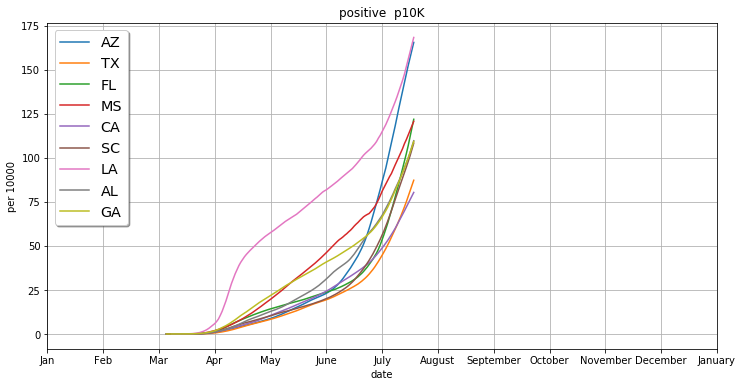

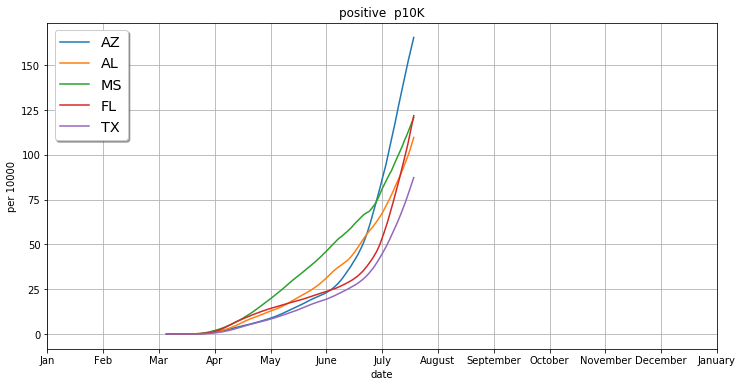

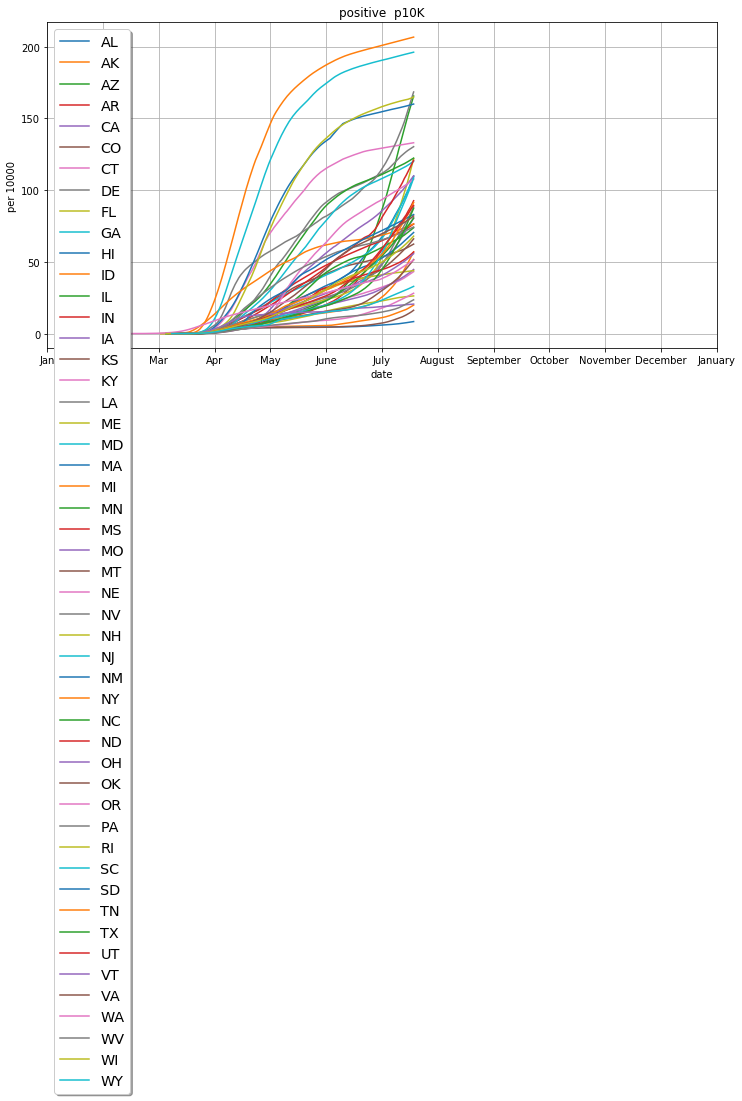

In [99]:
northEast = ['MA','CT','RI','VT','NH','ME']
midAtlantic = ['NY','PA','NJ','DE','MD','VA','WV']
southEast=['NC','SC','GA','FL','AL','MS','LA','AR','TN']
southWest = ['TX','OK','NM','CO','UT','AZ']
midWest=['OH','KY','IN','IL','MI','WI','MO','IA','MN',
         'KS','NE','SD','ND']
west = ['CA','NV','HI']
northWest = ['WY','MT','ID','OR','WA','AK']

highestR = ['AZ','TX','FL','MS','CA','SC','LA','AL','GA']




perCapita=True
averageByWeek=True

plt.rcParams['figure.figsize'] = [12, 6]
#fig, ax = plt.subplots()
field = 'positive'
#field = 'positiveIncrease'
#field = 'deathIncrease'
#field = "hospitalizedCurrently"
#field = "hospitalizedCumulative"
#field = "death"
#field = "positive"
#field = "hospitalized"
#field = "inIcuCurrently"
#field = "onVentilatorCurrently"
#field = "totalTestResultsIncrease"
## here we can plot all of the states!!
#for state in deepSouth:
#    plotItems(collectData([state],field,{'perCapita':perCapita,'averageByWeek':averageByWeek}),state)

options = {'perCapita':perCapita,'averageByWeek':averageByWeek}

for region in [northEast,midAtlantic,southEast,southWest,midWest,west,northWest,highestR,highestCases[:5],states]:
  fig, ax = plt.subplots()
  for x in region:
    #plotItems(collectData([x],field,options),x)
    plotItems(slope(0,collectData([x],field,options)),x)
  for y in [0]:
    ax.set(xlabel='day of year',
       ylabel='per 10000' if perCapita else "raw numbers",
       title=field+" "+(" p10K" if perCapita else " raw"))
    plt.xlabel('date')
    plt.xticks([0,30,60,90,120,150,180,210,240,270,300,330,360],'Jan Feb Mar Apr May June July August September October November December January'.split(' '))
    #plt.yticks(np.arange(-0.25,0.35,step=0.05))
    legend = ax.legend(loc='upper left', shadow=True, fontsize='x-large')
    ax.grid()
    flag = x
    fig.savefig("plot_"+flag+field+("_p10k" if perCapita else "_raw")+".png")